In [99]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [100]:
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [101]:
df.shape

(2938, 22)

In [102]:
type(df)

pandas.core.frame.DataFrame

In [103]:
df.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
6     Afghanistan  2009  Developing              58.6            281.0   
7     Afghanistan  2008  Developing              58.1            287.0   
8     Afghanistan  2007  Developing              57.5            295.0   
9     Afghanistan  2006  Developing              57.3            295.0   
10    Afghanistan  2005  Developing              57.3            291.0   
11    Afghanistan  2004  Developing              57.0            293.0   
12  

In [104]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [106]:
df.isnull().sum(axis = 0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [107]:
df = df.dropna()
df.shape

(1649, 22)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [109]:
df.isnull().sum(axis = 0)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [110]:
status = pd.get_dummies(df.Status) 
df = pd.concat([df, status], axis = 1)
df = df.drop(['Status'], axis=1)
df.rename(columns = {'Developing' : '0', 'Developed' : 1})

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,0
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [134]:
df = df.drop(['Developing'], axis=1)

In [135]:
df[120:120+5]

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
157,Azerbaijan,2002,67.8,146.0,7,0.55,39.332537,5.0,4353,43.1,...,4.47,76.0,0.1,763.738580,817195.0,3.1,3.1,0.651,10.6,0
193,Bangladesh,2014,71.4,132.0,98,0.01,10.446403,97.0,289,17.7,...,2.82,97.0,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0,0
194,Bangladesh,2013,71.0,135.0,104,0.01,52.829865,96.0,237,17.0,...,2.88,96.0,0.1,951.889454,157571292.0,18.3,18.8,0.565,10.0,0
195,Bangladesh,2012,77.0,137.0,111,0.01,59.258926,94.0,1986,16.4,...,3.80,94.0,0.1,856.342857,15572753.0,18.5,19.0,0.557,9.9,0
196,Bangladesh,2011,73.0,14.0,118,0.01,62.349885,96.0,5625,15.8,...,3.16,96.0,0.1,835.789341,153911916.0,18.7,19.2,0.545,9.4,0


In [136]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,...,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,0.146756
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,...,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,0.353969
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,...,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.000000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,...,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,0.000000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,...,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,0.000000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,...,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,0.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,...,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,1.000000


In [137]:
df.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed'],
      dtype='object')

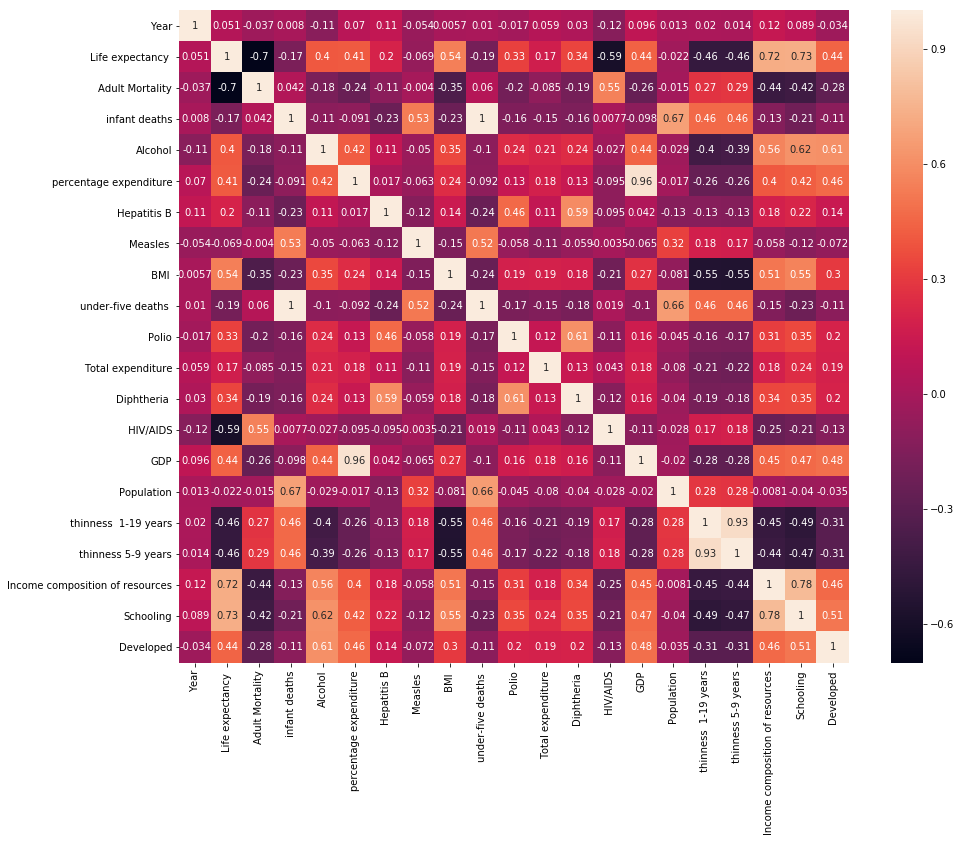

In [138]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), annot = True)

In [139]:
X = df[['Adult Mortality', 'Year', 'infant deaths', 'Alcohol', 
        'percentage expenditure', 'Hepatitis B', 'Measles ', 
        ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed']].values
X.shape

(1649, 20)

In [140]:
X

array([[2.630e+02, 2.015e+03, 6.200e+01, ..., 4.790e-01, 1.010e+01,
        0.000e+00],
       [2.710e+02, 2.014e+03, 6.400e+01, ..., 4.760e-01, 1.000e+01,
        0.000e+00],
       [2.680e+02, 2.013e+03, 6.600e+01, ..., 4.700e-01, 9.900e+00,
        0.000e+00],
       ...,
       [7.300e+01, 2.002e+03, 2.500e+01, ..., 4.270e-01, 1.000e+01,
        0.000e+00],
       [6.860e+02, 2.001e+03, 2.500e+01, ..., 4.270e-01, 9.800e+00,
        0.000e+00],
       [6.650e+02, 2.000e+03, 2.400e+01, ..., 4.340e-01, 9.800e+00,
        0.000e+00]])

In [141]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,...,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891,0.146756
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,...,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388,0.353969
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,...,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,0.000000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,...,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000,0.000000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,...,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000,0.000000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,...,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000,0.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,...,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,1.000000


In [142]:
y = df[['Life expectancy ']].values
y.shape

(1649, 1)

In [143]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [144]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [145]:
X_trainset.shape

(1154, 20)

In [146]:
y_trainset.shape

(1154, 1)

In [147]:
X_testset.shape

(495, 20)

In [148]:
y_testset.shape

(495, 1)

In [149]:
X

array([[2.630e+02, 2.015e+03, 6.200e+01, ..., 4.790e-01, 1.010e+01,
        0.000e+00],
       [2.710e+02, 2.014e+03, 6.400e+01, ..., 4.760e-01, 1.000e+01,
        0.000e+00],
       [2.680e+02, 2.013e+03, 6.600e+01, ..., 4.700e-01, 9.900e+00,
        0.000e+00],
       ...,
       [7.300e+01, 2.002e+03, 2.500e+01, ..., 4.270e-01, 1.000e+01,
        0.000e+00],
       [6.860e+02, 2.001e+03, 2.500e+01, ..., 4.270e-01, 9.800e+00,
        0.000e+00],
       [6.650e+02, 2.000e+03, 2.400e+01, ..., 4.340e-01, 9.800e+00,
        0.000e+00]])

In [166]:
reg_all = LinearRegression()
reg_all.fit(X_trainset, y_trainset)
y_pred = reg_all.predict(X_testset)
print('R^2: {}'.format(reg_all.score(X_testset, y_testset)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_testset))))

R^2: 0.8427037778089941
rmse: 3.6216271382784853


In [167]:
reg_all.predict([[263, 2015, 62, 0.01, 
        71.27962, 65, 1154, 
        9.1, 83, 6, 8.16,
       65, 0.1, 584.2592, 33736494,
       17.2, 17.3, 0.479, 10.1, 0]])

array([[62.46963093]])

In [171]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(max_depth=4, random_state=0)
random_forest_reg.fit(X_trainset, y_trainset)
y_pred = random_forest_reg.predict(X_testset)
print('R^2: {}'.format(random_forest_reg.score(X_testset, y_testset)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_testset))))

R^2: 0.914810331464091
rmse: 2.665250625538691


In [172]:
random_forest_reg.predict([[263, 2015, 62, 0.01, 
        71.27962, 65, 1154, 
        9.1, 83, 6, 8.16,
       65, 0.1, 584.2592, 33736494,
       17.2, 17.3, 0.479, 10.1, 0]])

array([63.97587374])

In [190]:
random_forest_reg2 = RandomForestRegressor(max_depth=5, random_state=0)
random_forest_reg2.fit(X_trainset, y_trainset)
y_pred = random_forest_reg2.predict(X_testset)
print('R^2: {}'.format(random_forest_reg2.score(X_testset, y_testset)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_testset))))

R^2: 0.9324113282844745
rmse: 2.3740045419314146


In [191]:
random_forest_reg2.predict([[263, 2015, 62, 0.01, 
        71.27962, 65, 1154, 
        9.1, 83, 6, 8.16,
       65, 0.1, 584.2592, 33736494,
       17.2, 17.3, 0.479, 10.1, 0]])

array([63.87865614])

In [155]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [156]:
wml_credentials={
  "apikey": "YbN29BVzmug90Kie0vtgOfJMEfG4n1hdrpcon1IJh1g3",
  "iam_apikey_description": "Auto-generated for key 56aae863-f80f-4c83-86c9-18946c94f126",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5543f54112c14eadaf19fb87382276af::serviceid:ServiceId-3684aad9-de90-4451-81c4-f6ff93d2d249",
  "instance_id": "f09f24bc-ac23-473f-b389-43a87aab7afa",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [157]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [158]:
metadata = {
    client.repository.ModelMetaNames.AUTHOR_NAME: 'Shreya',
    client.repository.ModelMetaNames.NAME: "LifeExpectancy"
}

In [192]:
model_details = client.repository.store_model(random_forest_reg2, meta_props = metadata)

In [193]:
model_details

{'metadata': {'guid': '5a7cda38-f978-46e3-8096-8843b17f7ea5',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/5a7cda38-f978-46e3-8096-8843b17f7ea5',
  'created_at': '2020-06-29T14:44:43.929Z',
  'modified_at': '2020-06-29T14:44:43.994Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/5a7cda38-f978-46e3-8096-8843b17f7ea5/learning_configuration',
  'author': {'name': 'Shreya'},
  'name': 'LifeExpectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/5a7cda38-f978-46e3-8096-8843b17f7ea5/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/published_models/5a7cda38-f978-46e3-8096-8843b17f7ea5/feedback',
  'latest_version': {'url': 'ht

In [194]:
published_model_uid = client.repository.get_model_uid(model_details)
published_model_uid

'5a7cda38-f978-46e3-8096-8843b17f7ea5'

In [195]:
created_deployment = client.deployments.create(published_model_uid, name = "LifePredict")



#######################################################################################

Synchronous deployment creation for uid: '5a7cda38-f978-46e3-8096-8843b17f7ea5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='540ba115-55b2-41b7-abbe-b76883d90a2e'
------------------------------------------------------------------------------------------------




In [196]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f09f24bc-ac23-473f-b389-43a87aab7afa/deployments/540ba115-55b2-41b7-abbe-b76883d90a2e/online'